# References

Section Data Exploration:
- https://www.kaggle.com/andredornas/tp2-walmart-sales-forecast/notebook#Data-manipulation 
- https://www.kaggle.com/nsawal/walmart-baseline-sales-forecasting-lstm

#  Import Packages

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="ticks", color_codes=True)

# Import Data

In [2]:
home_dir = os.getcwd()
data_dir = home_dir + '\data'
data_preprocessed_dir = home_dir + '\data_preprocessed'
print(home_dir)
print(data_dir)
print(data_preprocessed_dir)

C:\dev\predicting-sales-data\warm-up
C:\dev\predicting-sales-data\warm-up\data
C:\dev\predicting-sales-data\warm-up\data_preprocessed


In [3]:
df_store = pd.read_csv(data_dir + '/stores.csv')
df_feature = pd.read_csv(data_dir + '/features.csv')
df_train = pd.read_csv(data_dir + '/train.csv')
df_test = pd.read_csv(data_dir + '/test.csv')

# Data Exploration

### Stores Data

In [4]:
df_store.head().append(df_store.tail())

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [5]:
print("Structure of Store:\n", df_store.shape, '\n')
print("Number of missing values:\n",
      df_store.isnull().sum().sort_values(ascending=False), "\n")

Structure of Store:
 (45, 3) 

Number of missing values:
 Size     0
Type     0
Store    0
dtype: int64 



### Feature Data

In [6]:
df_feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [7]:
df_feature.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [8]:
print("Structure of Feature: ", df_feature.shape, "\n")
print("Count of missing values:\n", df_feature.isnull(
).sum().sort_values(ascending=False), "\n")

Structure of Feature:  (8190, 12) 

Count of missing values:
 MarkDown2       5269
MarkDown4       4726
MarkDown3       4577
MarkDown1       4158
MarkDown5       4140
Unemployment     585
CPI              585
IsHoliday          0
Fuel_Price         0
Temperature        0
Date               0
Store              0
dtype: int64 



In [9]:
feature_percent_missing = df_feature.isnull().sum()*100/len(df_feature)
feature_data_type = df_feature.dtypes

feature_summary = pd.DataFrame({"Percent_missing": feature_percent_missing.round(2),
                                "Datatypes": feature_data_type})

feature_summary

,Percent_missing,Datatypes
Store,0.00,int64
Date,0.00,object
Temperature,0.00,float64
Fuel_Price,0.00,float64
MarkDown1,50.77,float64
MarkDown2,64.33,float64
MarkDown3,55.89,float64
MarkDown4,57.70,float64
MarkDown5,50.55,float64
CPI,7.14,float64


### Train Data

In [10]:
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [11]:
print("Structure of train:\n", df_train.shape, "\n")
print("Summary Statistic:\n", df_train.describe(), "\n")

Structure of train:
 (421570, 5) 

Summary Statistic:
                Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000 



In [12]:
train_percent_missing = df_train.isnull().sum()*100/len(df_train)
train_datatype = df_train.dtypes

train_summary = pd.DataFrame({"Percent_Missing": train_percent_missing.round(2),
                              "Datatypes": train_datatype})

train_summary

,Percent_Missing,Datatypes
Store,0.0,int64
Dept,0.0,int64
Date,0.0,object
Weekly_Sales,0.0,float64
IsHoliday,0.0,bool


### Test Data

In [13]:
df_test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [14]:
print("Structure of test:\n", df_test.shape, "\n")
print("Summary Statistic:\n", df_test.describe(), "\n")

Structure of test:
 (115064, 4) 

Summary Statistic:
                Store           Dept
count  115064.000000  115064.000000
mean       22.238207      44.339524
std        12.809930      30.656410
min         1.000000       1.000000
25%        11.000000      18.000000
50%        22.000000      37.000000
75%        33.000000      74.000000
max        45.000000      99.000000 



In [15]:
test_percent_missing = df_test.isnull().sum()*100/len(df_test)
test_datatypes = df_test.dtypes

test_summary = pd.DataFrame({"Datatypes": test_datatypes,
                             "Percent_Missing": test_percent_missing.round(2)})

test_summary

,Datatypes,Percent_Missing
Store,int64,0.0
Dept,int64,0.0
Date,object,0.0
IsHoliday,bool,0.0


# Merge Datasets

In [16]:
df_merged = df_train.merge(df_store, how='left').merge(df_feature, how='left')

In [17]:
df_merged

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [18]:
df_merged.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


Save merged Data Frame

In [19]:
df_merged.to_csv(data_preprocessed_dir+'/input_data_merged.csv', index=False)

# Data Visualization

In [20]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column], dataset['Weekly_Sales'])
    plt.ylabel('weeklySales')
    plt.xlabel(column)

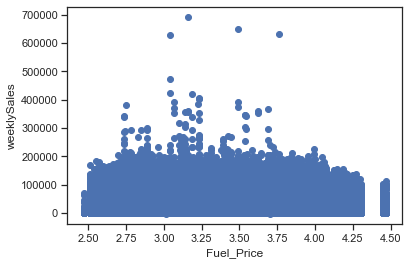

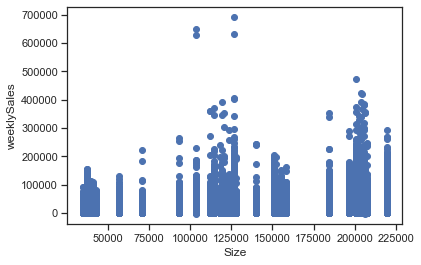

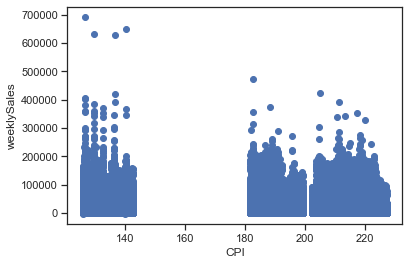

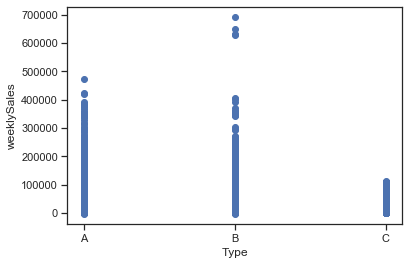

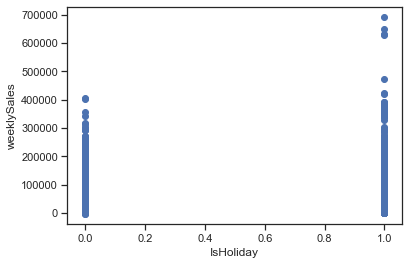

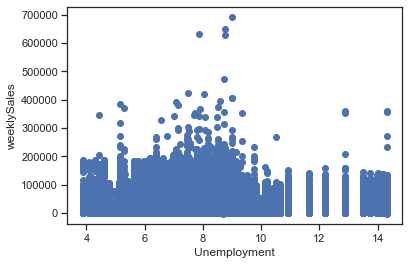

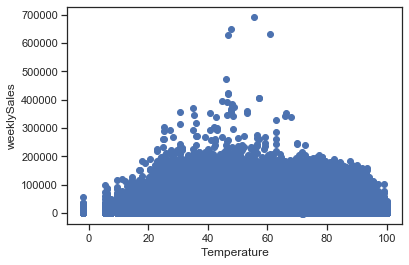

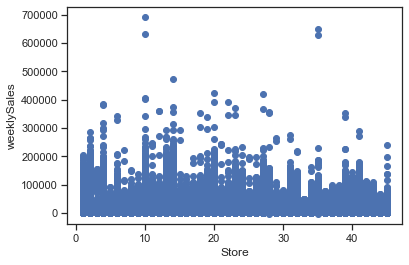

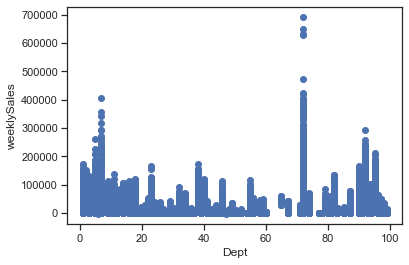

In [21]:
scatter(df_merged, 'Fuel_Price')
scatter(df_merged, 'Size')
scatter(df_merged, 'CPI')
scatter(df_merged, 'Type')
scatter(df_merged, 'IsHoliday')
scatter(df_merged, 'Unemployment')
scatter(df_merged, 'Temperature')
scatter(df_merged, 'Store')
scatter(df_merged, 'Dept')

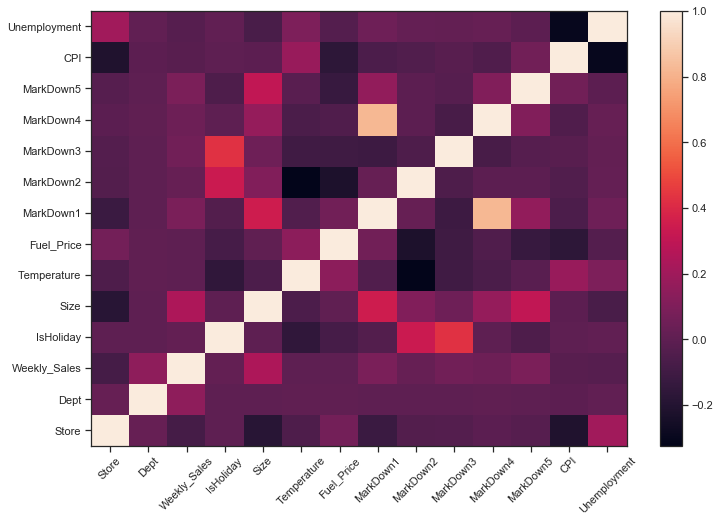

In [22]:
fig = plt.figure(figsize=(12, 8))
corr = df_merged.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns, rotation=45)
fig.colorbar(c)

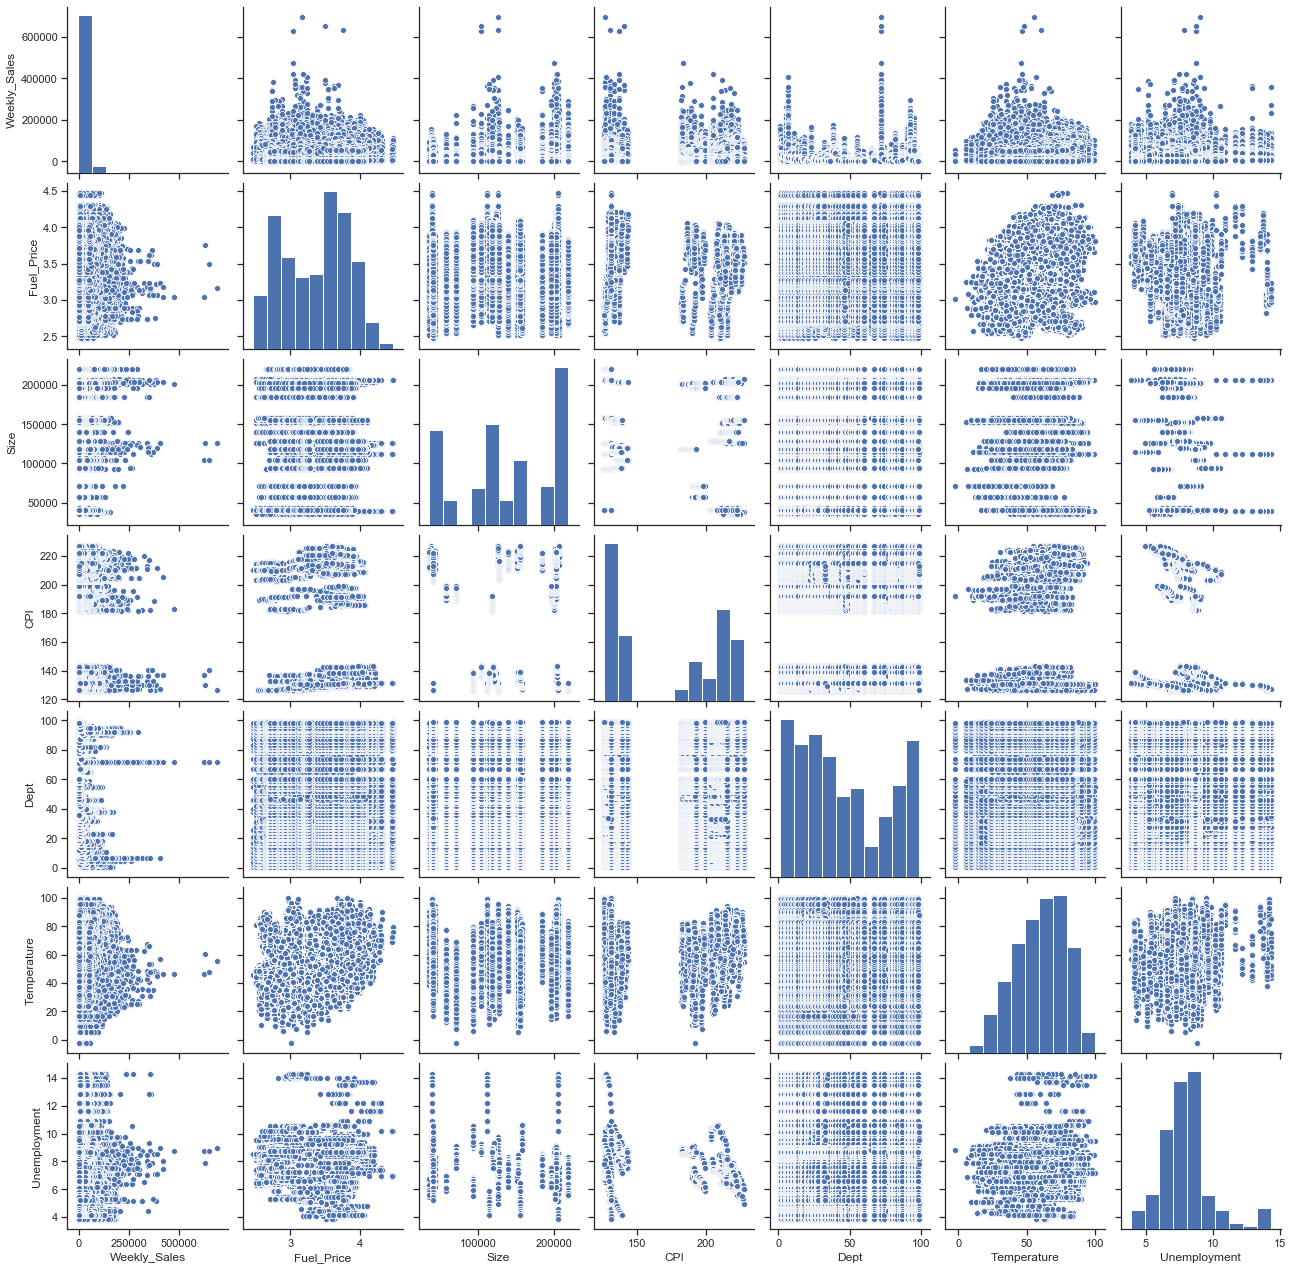

In [23]:
sns.pairplot(df_merged, vars=['Weekly_Sales', 'Fuel_Price',
                              'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

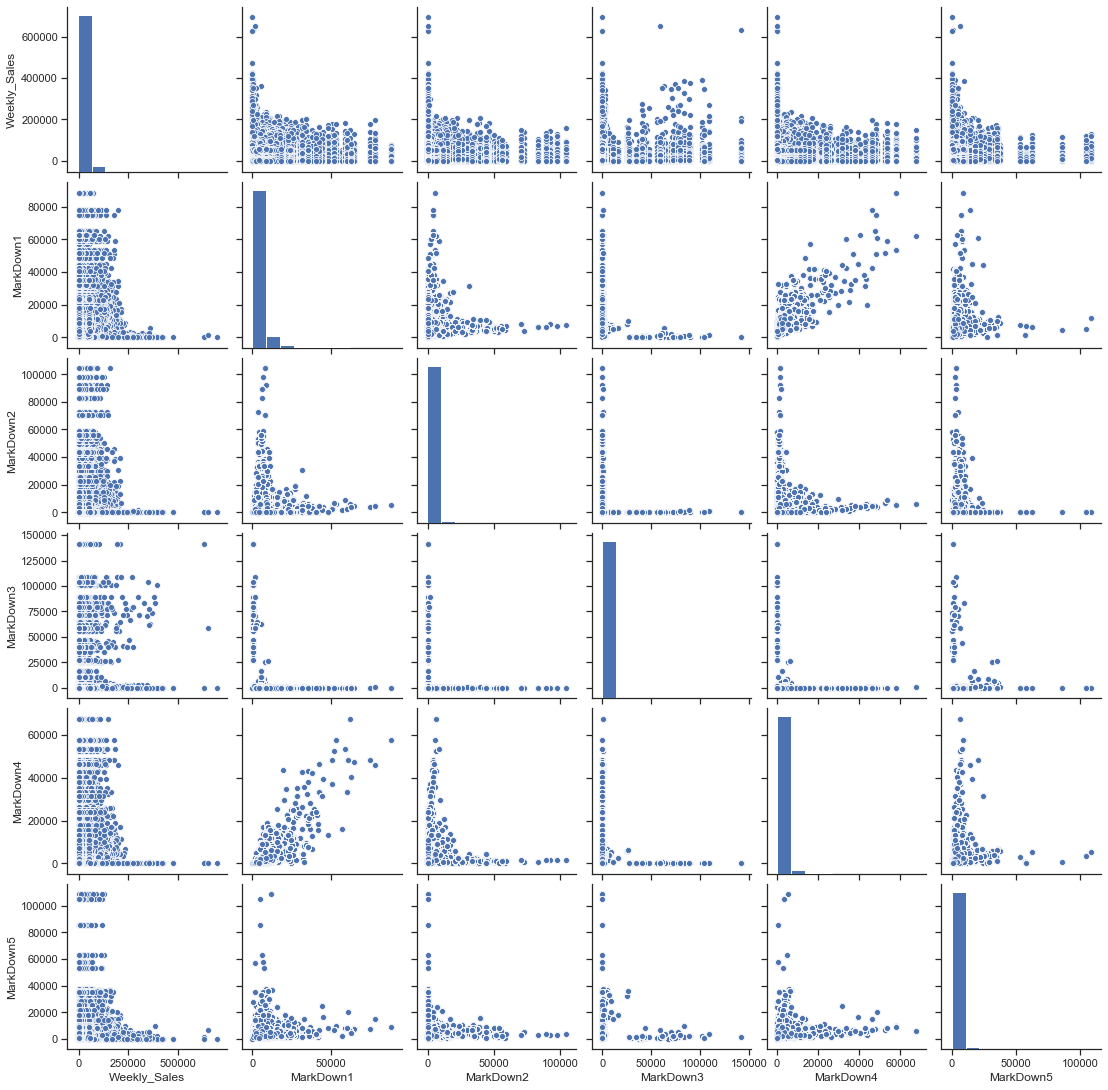

In [24]:
sns.pairplot(df_merged.fillna(0), vars=[
             'Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

# Plot Time Series on Department Level

Sample n random Store-Department combinations

In [20]:
store_i_dept_i = df_merged[['Store','Dept']].drop_duplicates().sample(n=10, random_state=1).values.tolist()

Plot time series

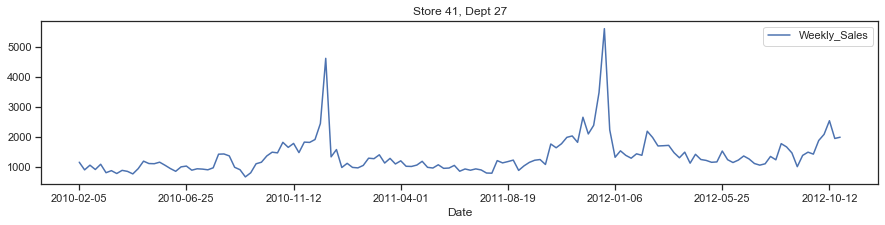

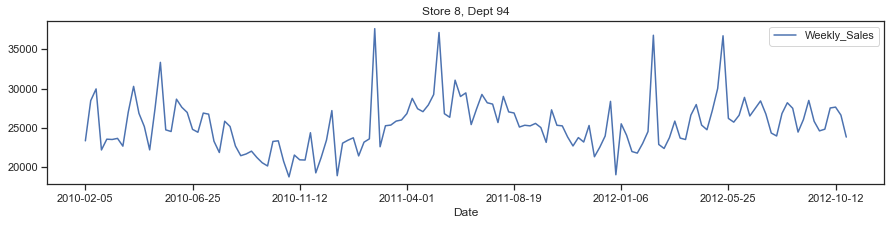

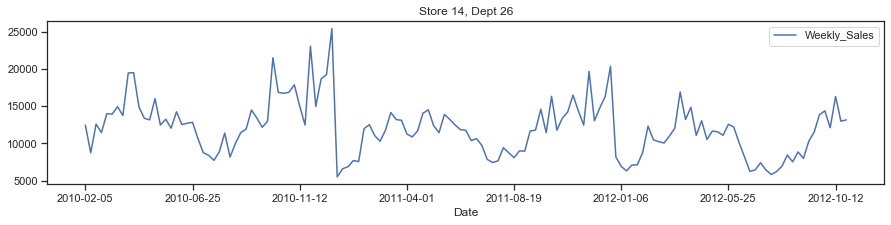

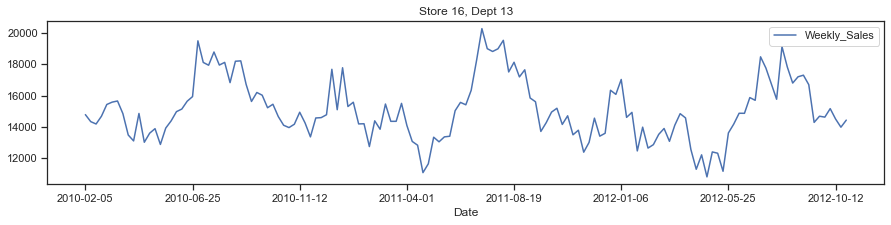

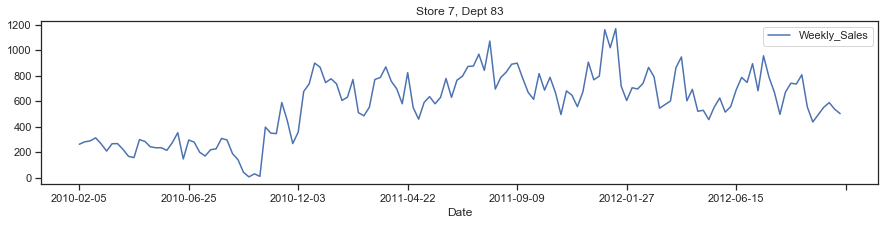

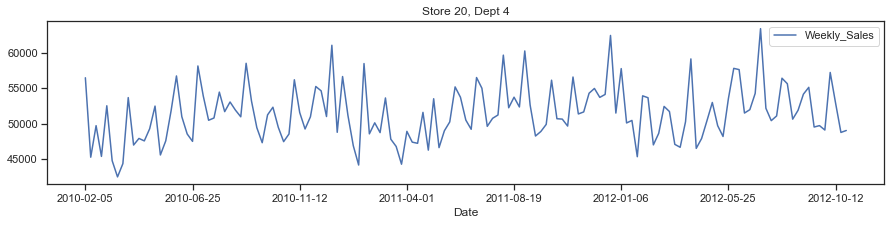

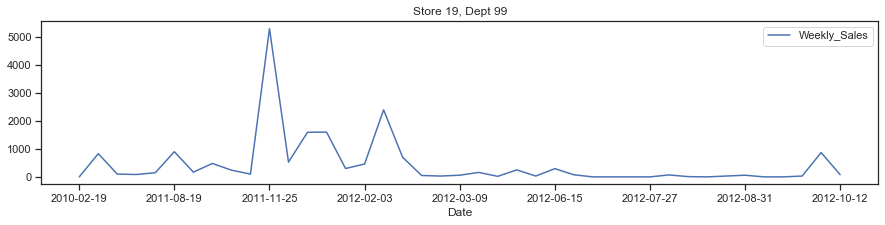

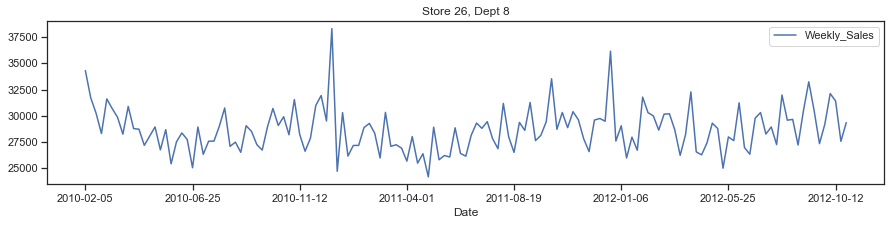

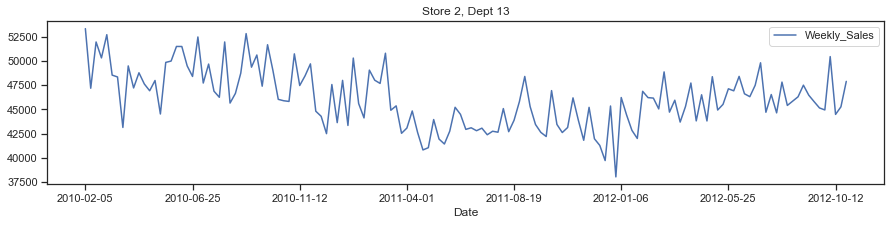

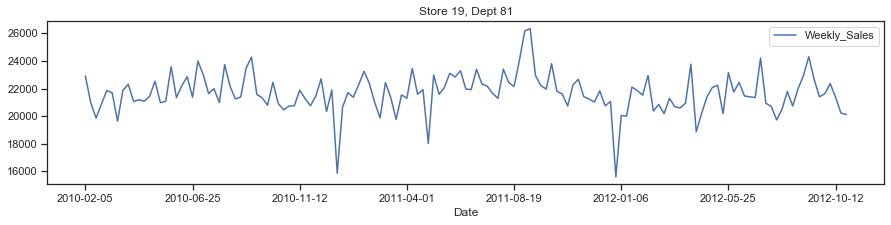

In [21]:

for si, di in store_i_dept_i:
    df_si_di = df_merged.loc[df_merged['Store'] == si].loc[df_merged['Dept'] == di][['Store','Dept','Date', 'Weekly_Sales']]
    df_si_di.plot(x='Date', y='Weekly_Sales', style='-', figsize=(15,3), title=f'Store {si}, Dept {di}')


Overlapping Time Series Plot

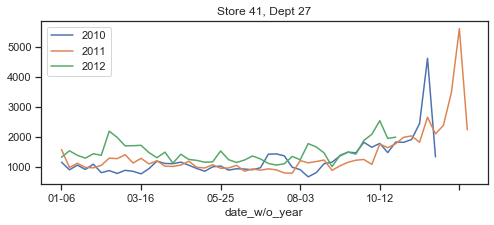

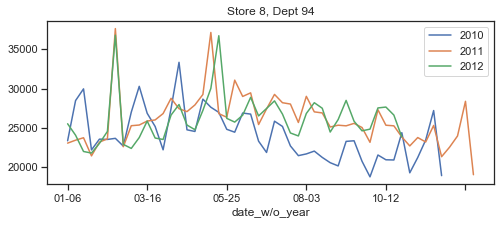

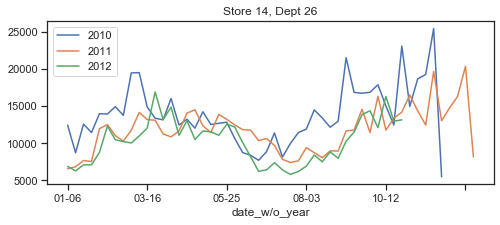

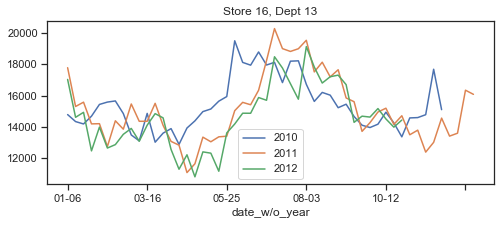

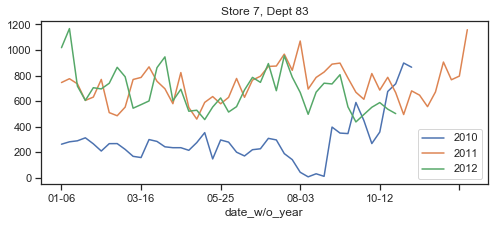

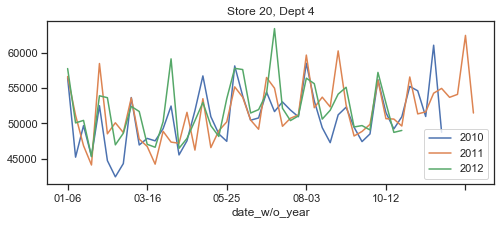

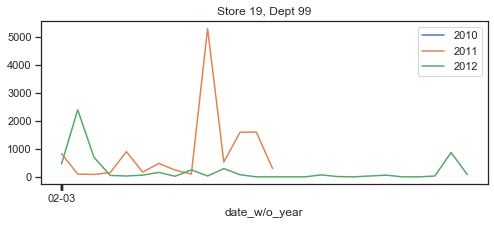

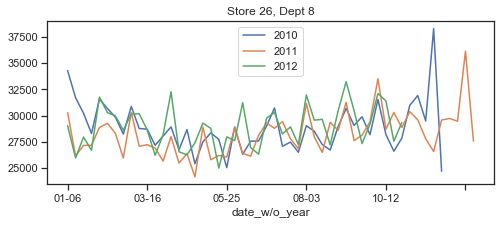

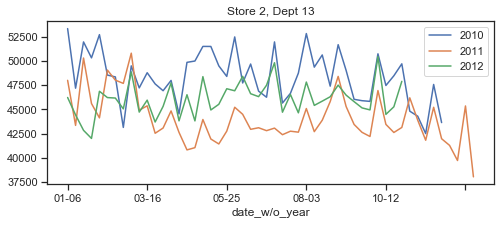

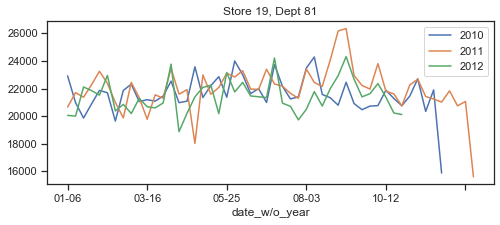

In [22]:
for si, di in store_i_dept_i:
    df_si_di = df_merged.loc[df_merged['Store'] == si].loc[df_merged['Dept'] == di][['Store','Dept','Date', 'Weekly_Sales']]
    df_si_di['year'] = pd.DatetimeIndex(df_si_di['Date']).year
    df_si_di['date_w/o_year'] = pd.DatetimeIndex(df_si_di['Date']).strftime('%m-%d')
    
    fig, ax = plt.subplots(figsize=(8,3))
    df_si_di.groupby('year').plot(x='date_w/o_year', y='Weekly_Sales', ax=ax, legend=False)
    ax.legend(df_si_di['year'].unique().tolist())
    ax.set_title(f'Store {si}, Dept {di}')

###   $\color{red}{\text{FINDINGS:}}$ 
Often a peak around Christmas, but no proper structure (trend or seasonality) on department level visible.  
Thus, let's plot time series on store level.


# Plot Time Series on Store Level

Sample n random Stores

In [23]:
store_i  = df_merged['Store'].drop_duplicates().sample(n=10, random_state=1).values.tolist()

Data Aggregation

In [24]:
df = df_merged[['Store','Dept','Date', 'Weekly_Sales']]
df = pd.pivot_table(df, values='Weekly_Sales', index=['Store', 'Date'], aggfunc=np.sum)
df.reset_index(level=df.index.names, inplace=True)


Plot time series

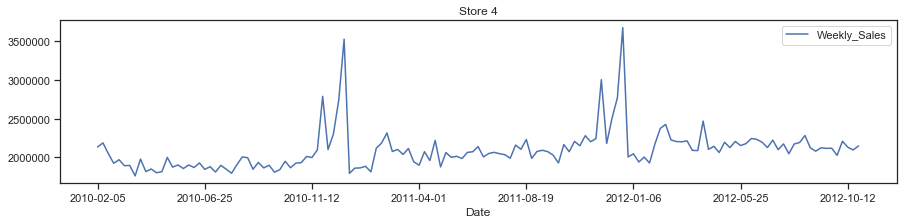

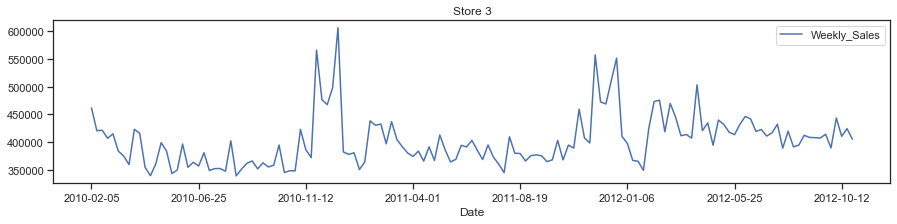

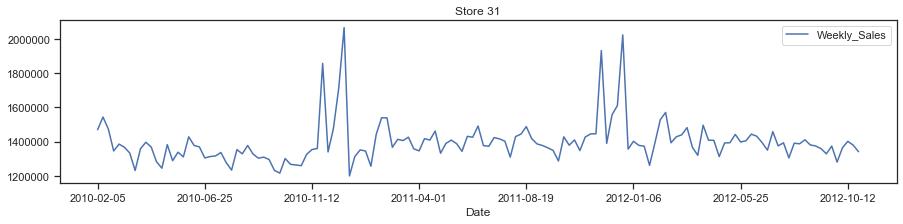

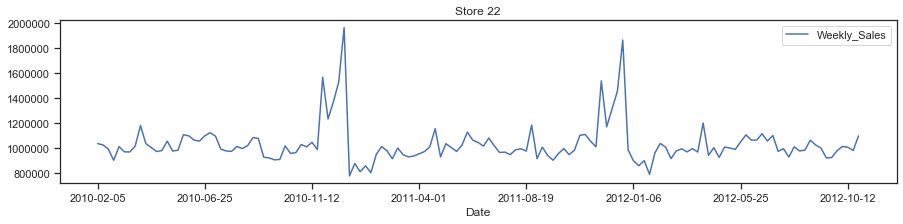

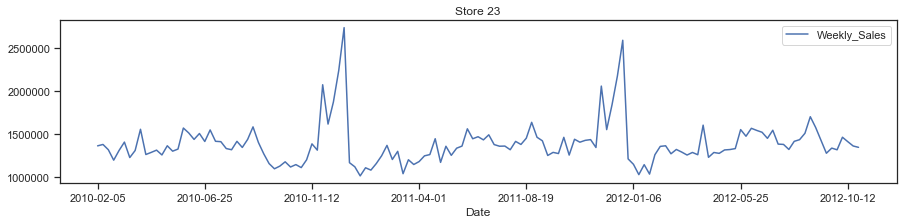

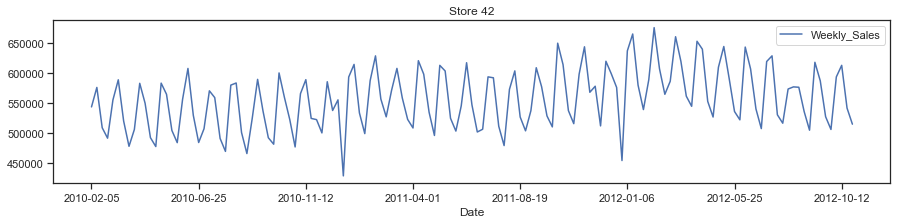

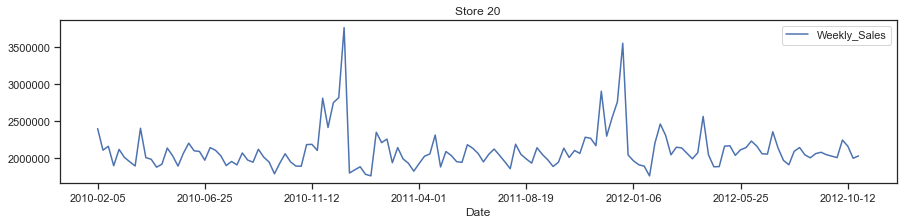

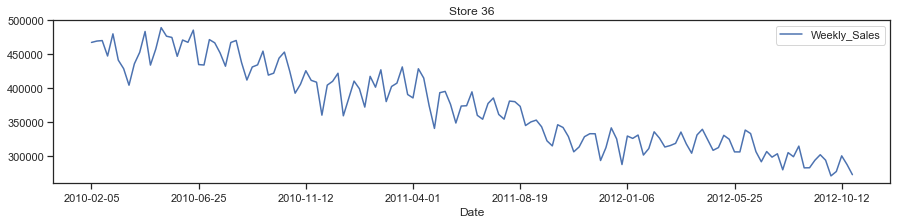

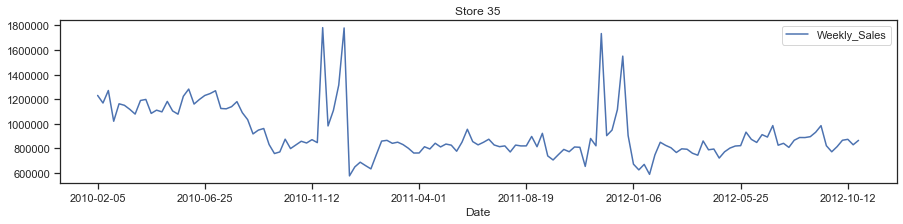

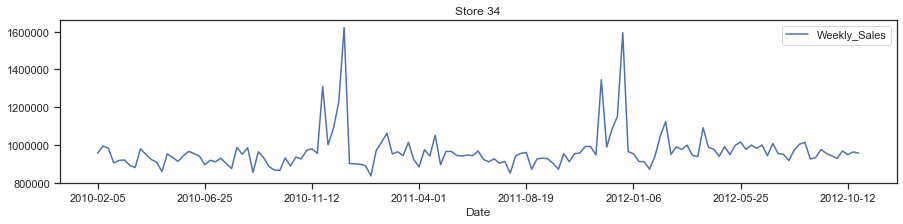

In [25]:
for s in store_i:
    df_s = df.loc[df['Store'] == s]
    df_s.plot(x='Date', y='Weekly_Sales', style='-', figsize=(15,3), title=f'Store {s}')


Overlapping Timeseries Plot

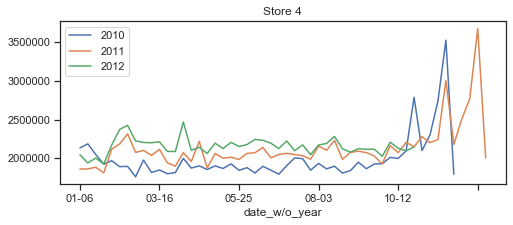

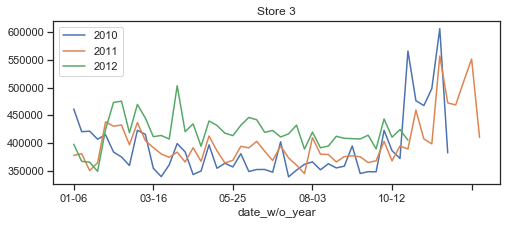

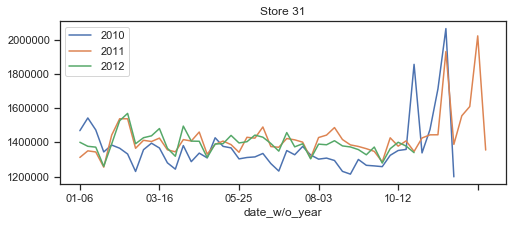

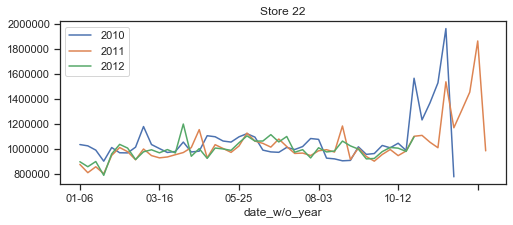

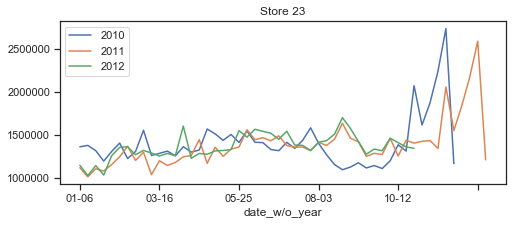

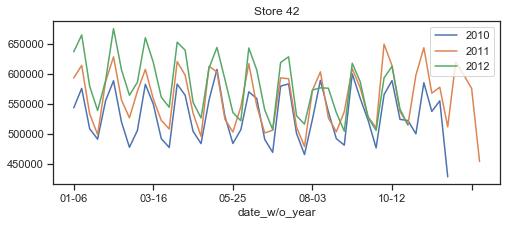

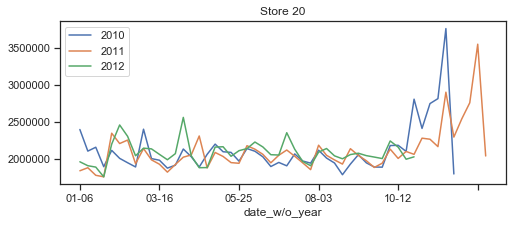

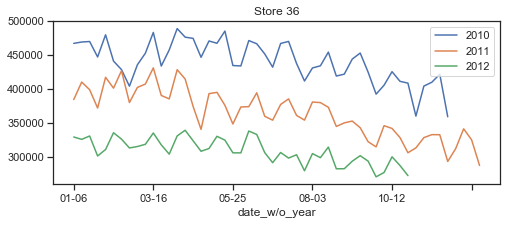

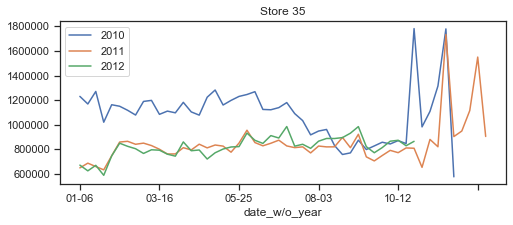

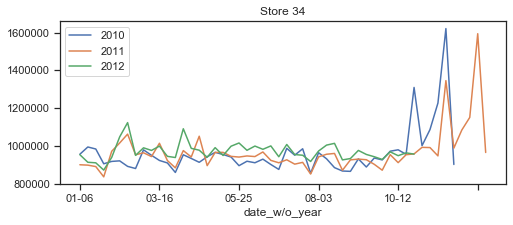

In [26]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['date_w/o_year'] = pd.DatetimeIndex(df['Date']).strftime('%m-%d')

for s in store_i:
    df_s = df.loc[df['Store'] == s]
    
    fig, ax = plt.subplots(figsize=(8,3))
    df_s.groupby('year').plot(x='date_w/o_year', y='Weekly_Sales', ax=ax, legend=False)
    ax.legend(df_s['year'].unique().tolist())
    ax.set_title(f'Store {s}')

###   $\color{red}{\text{FINDINGS:}}$ 
- Peak at Christmas
- Sometimes trend
- Often a clear seasonality than on department level

# ACF & PACF

In [102]:
from statsmodels.tsa.stattools import acf, pacf

def plot_acf(pd_series, title=None):
    pd.DataFrame(acf(pd_series)).plot(kind="bar", figsize=(10,5), grid=True, legend=False)
    plt.xlabel("lag")
    plt.axhline(y=0.05, ls='--', color='red')
    plt.axhline(y=-0.05, ls='--', color='red')
    plt.title(title)

def plot_pacf(pd_series, title=None):
    pd.DataFrame(pacf(pd_series)).plot(kind="bar", figsize=(10,5), grid=True, legend=False)
    plt.xlabel("lag")
    plt.axhline(y=0.05, ls='--', color='red')
    plt.axhline(y=-0.05, ls='--', color='red')
    plt.title(title)

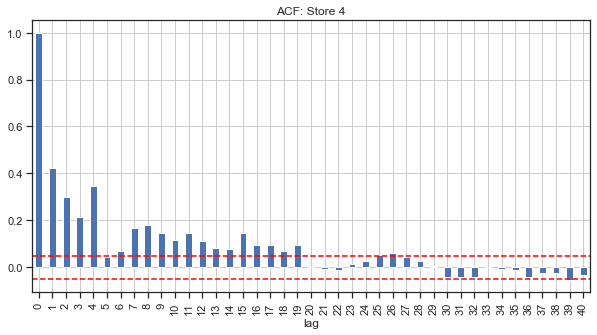

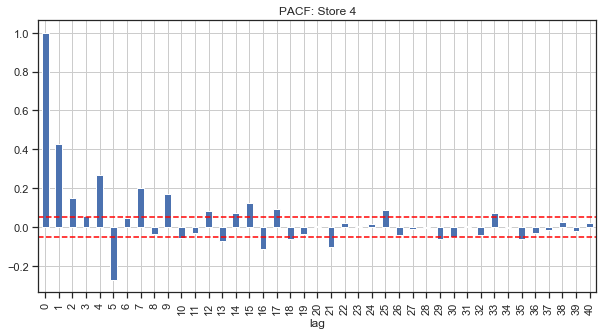

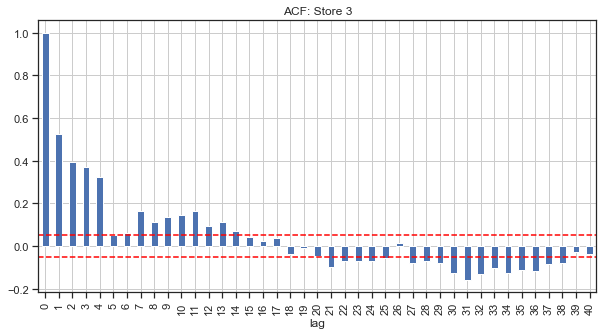

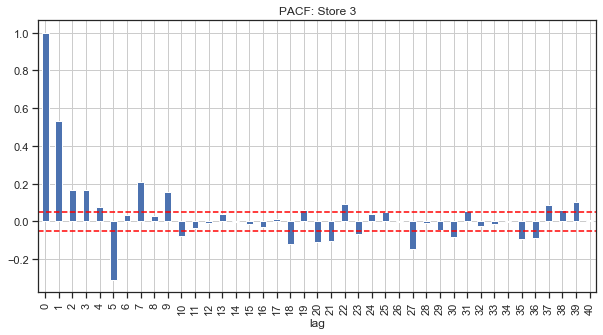

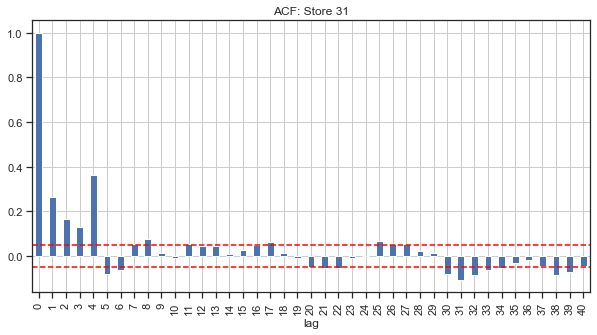

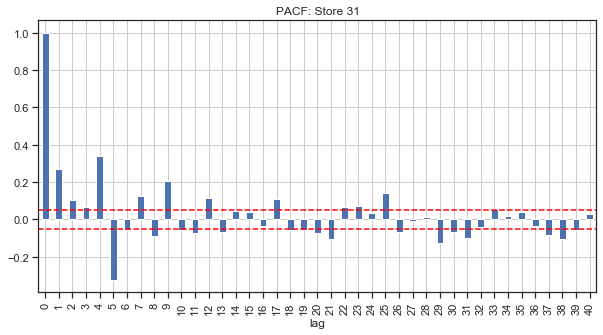

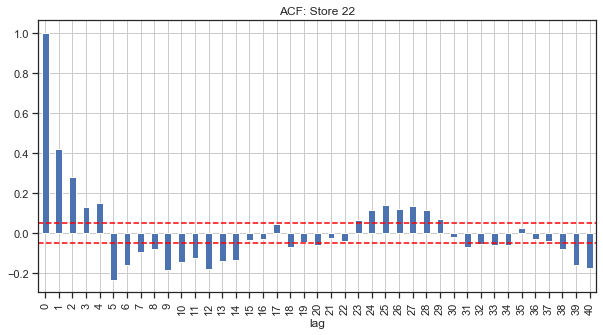

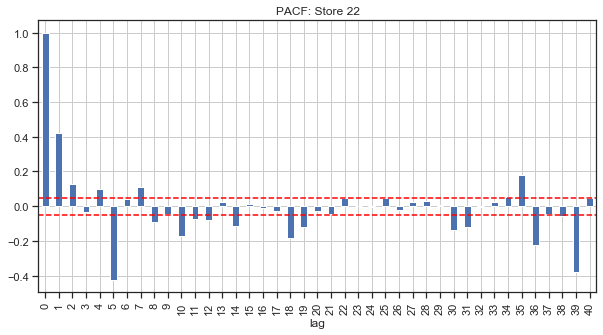

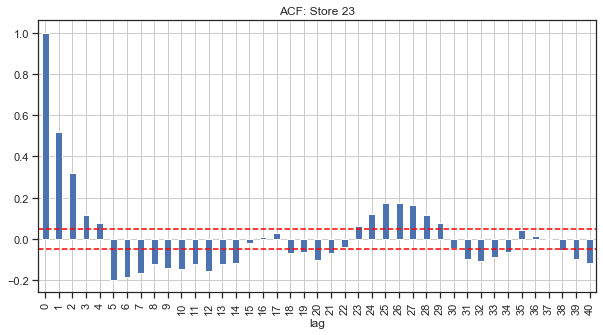

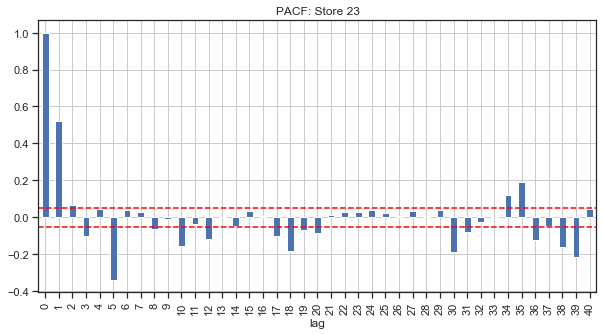

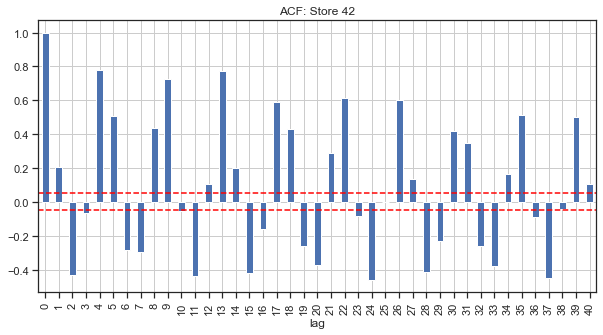

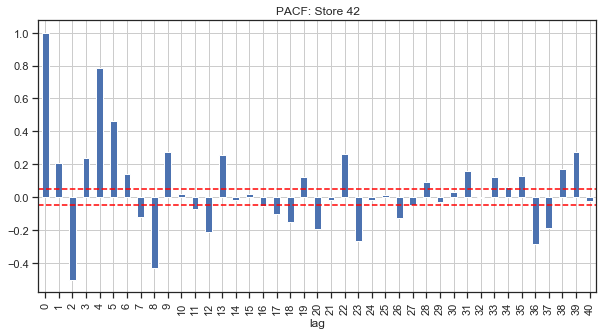

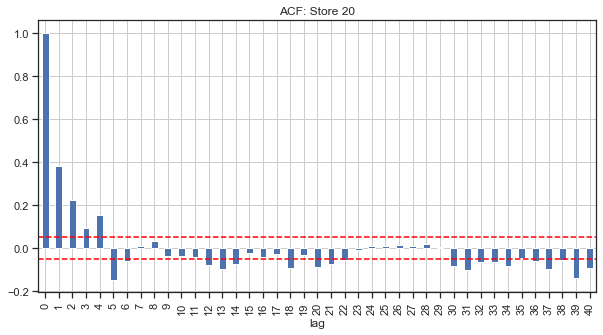

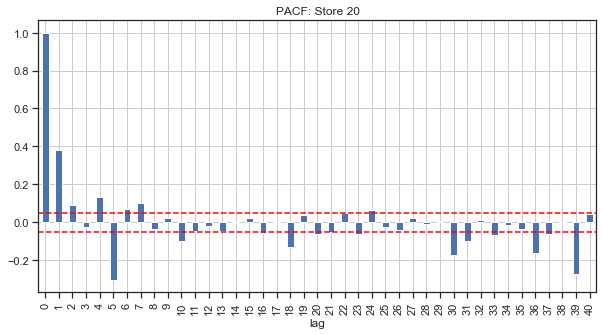

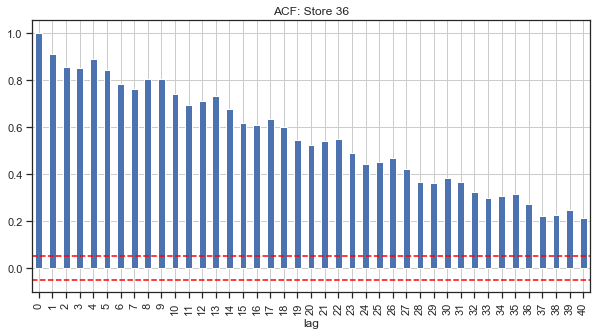

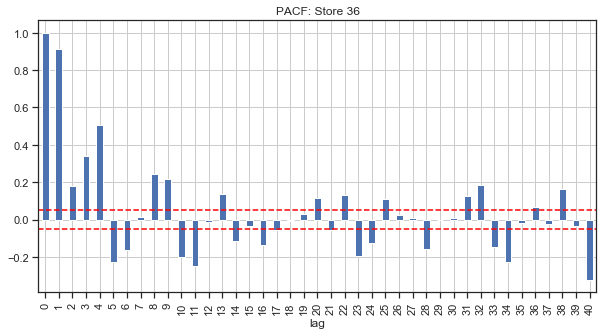

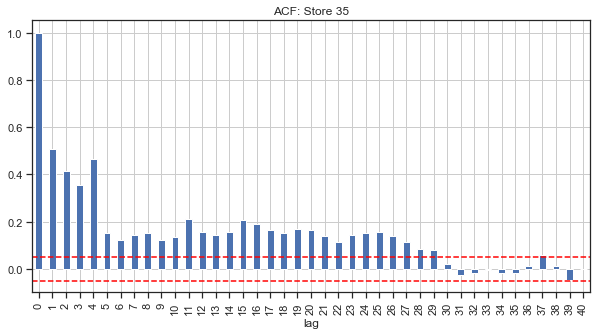

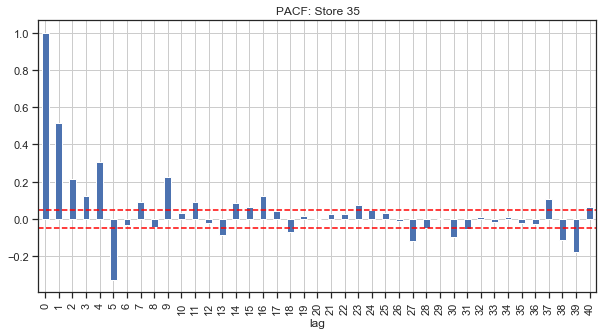

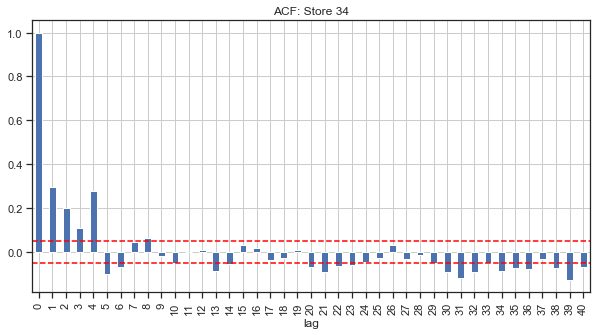

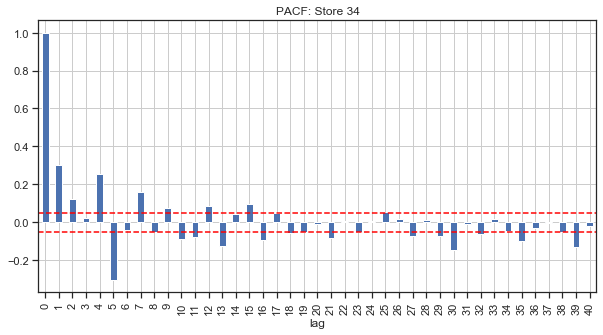

In [110]:
for s in store_i:
    plot_acf(df[df['Store'] == s]['Weekly_Sales'], f'ACF: Store {s}')
    plot_pacf(df[df['Store'] == s]['Weekly_Sales'], f'PACF: Store {s}')
    
